In [1]:
# To read data from diamonds.csv
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

headers = ["carat","cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767


In [2]:
x = data.drop(['price'], axis=1)
y = data['price']

#Encoding Categorical Data 
handle_cut = {'cut': {'Fair':1 ,'Good':2 ,'Very Good':3 ,'Premium': 4,'Ideal': 5 } }
handle_color = {'color': {'J':1 ,'I':2 ,'H':3 ,'G': 4 ,'F':5 ,'E':6 ,'D':7 } }
handle_clarity = {'clarity': {'I1':1 ,'SI2':2 ,'SI1':3 ,'VS2':4 ,'VS1':5 ,'VVS2':6 ,'VVS1':7 ,'IF':8 } }
x.replace(handle_cut, inplace=True)
x.replace(handle_color, inplace=True)
x.replace(handle_clarity, inplace=True)

#scaling 
columns_scaling = ['carat','depth','table','x','y','z','cut','color','clarity']
for col in columns_scaling:
    x[col] = x[col].astype(float)
    carat_min = x[col].min()
    carat_max = x[col].max()
    x[col] = (x[col]-carat_min)/(carat_max-carat_min)

In [3]:
#splitting
train_x,tt_x,train_y,tt_y = train_test_split(x,y, test_size=0.2, random_state=1)
validate_x,test_x,validate_y,test_y = train_test_split(tt_x,tt_y, test_size=0.5, random_state=1)
#print(x.shape,train_y.shape,test_y.shape,validate_y.shape)

#modelling
train_x = train_x.to_numpy()
train_y = train_y.astype(float)
train_y = train_y.to_numpy()
validate_x = validate_x.to_numpy()
validate_y = validate_y.astype(float)
validate_y = validate_y.to_numpy()
test_x = test_x.to_numpy()
test_y = test_y.astype(float)
test_y = test_y.to_numpy()
testt_y = test_y

In [4]:
# Creating Knn 

class knn:
    
    def fit(x,y,z):
        global xt
        xt = x
        global yt
        yt = y
        global k
        k = z
        
    def predict(xtes):
        final = []
        for i in range(xtes.shape[0]):
            d = dict()
            for j in range(xt.shape[0]):
                value = yt[j]
#               Using Manhattan Distance
                diff= np.absolute(xtes[i]-xt[j]).sum()
    
#               Using Euclidean Distance
#                 diff = np.power(xtes[i]-xt[j],2).sum()
#                 diff = math.sqrt(diff) 

                d[diff] = value
                
            a = sorted(d.keys())
            arr = []
            for i in range(k):
                arr.append(d[a[i]])
                
            final.append(np.mean(arr))
        
        return final

In [5]:
# Calling function

knn.fit(train_x,train_y,5)
pred = knn.predict(test_x)

In [6]:
# Defining error metrics 

def mse(p,y):
    
    error = np.power(p - y,2).sum() 
    error = error/y.shape[0]
    return error


def mae(p,y):
    
    error = np.absolute(p - y).sum()
    error = error / y.shape[0]
    return error


def rsquared(p,y):

    error = np.corrcoef(p,y)
    error = error[0,1]
    rsq=error**2
    return rsq

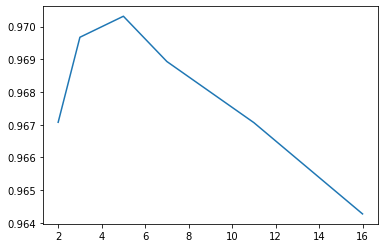

In [7]:
# plot
euclidean_dist = np.sum(train_x**2,axis=1) + np.sum(validate_x**2, axis=1)[:, np.newaxis] - 2*np.dot(validate_x,train_x.T)
k_values=[2,3,5,7,11,16]
r2_values = list()
for k in k_values:
    estimated_euclidean_price = np.zeros(validate_y.shape[0])
    for i in range(validate_y.shape[0]):
        k_nearest_neighbours = np.argpartition(euclidean_dist[i], k)[:k]
        estimated_euclidean_price[i] = (train_y[k_nearest_neighbours].sum())/k
    
    r2_values.append(rsquared(estimated_euclidean_price,validate_y))
#print(k_values,r2_values)
plt.plot(k_values,r2_values)

In [8]:
# table of mse , mae , rsquared errors

# k=5 gives least mse, mae and highest rsquared error

d = {"mse":[516963.6161290323 , 434803.40294401185],
    "mae":[368.4897664071191 , 343.0491286614757],
    "r2_score":[0.9665926611886084,0.9718111969654643]}

table = pd.DataFrame(d,index=['euclidean','manhattan'])
table

,mse,mae,r2_score
euclidean,516963.616129,368.489766,0.966593
manhattan,434803.402944,343.049129,0.971811
